In [48]:
import pandas as pd


In [49]:
data_df=pd.read_csv("Categorisation.csv", encoding='ISO-8859-1')
print(data_df.columns)

Index(['SL NO:', 'Dept. Name', 'Audit Unit Name', 'Period of last Audit',
       'PARA NO. ', 'Audit Office', 'Para_ID', 'Para Subject',
       'Observation Category Description', 'Observation Category', 'IIA/IIB',
       'Monetory Amount', 'Recovery Amount', 'IR Despatch Date', 'Stage',
       'Status', 'Query raised by', 'Query date', 'Response', 'Response date',
       'Rejoinder date', 'Resource', 'File Type'],
      dtype='object')


In [50]:
data=data_df[['Para Subject', 'Observation Category']]
print(data.head())

                                        Para Subject Observation Category
0  Short levy of clinical fees from Dr. Ambedakar...                    B
1  Difference Amount of Clinical Fees in respect ...                    B
2             Excess payment of electricity charges                     D
3  Excess payment of sanitary charges to BWSSB Rs...                    D
4  Non-collection of rent from shops let out in t...                    J


In [51]:
data['Observation Category'].unique()

array(['\xa0B', '\xa0D', 'J', 'D', 'B', 'E', 'I', 'F', '\xa0F', '\xa0J',
       '\xa0G', 'G', '\xa0H', '\xa0E', '\xa0I', '\xa0A', 'A', nan, 'C',
       'B\xa0', '\xa0C', '\xa0 B', 'F\xa0'], dtype=object)

In [52]:
data.dropna(subset=['Observation Category'], inplace=True, how='all')

c:\Users\vskar\OneDrive\Desktop\semanticweb\myenv\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [53]:
data['Observation Category'].unique()

array(['\xa0B', '\xa0D', 'J', 'D', 'B', 'E', 'I', 'F', '\xa0F', '\xa0J',
       '\xa0G', 'G', '\xa0H', '\xa0E', '\xa0I', '\xa0A', 'A', 'C',
       'B\xa0', '\xa0C', '\xa0 B', 'F\xa0'], dtype=object)

In [54]:
data['Observation Category']=data['Observation Category'].apply(
    lambda s:''.join([c for c in s if c.isupper()])
)

C:\Users\vskar\AppData\Local\Temp/ipykernel_17036/4220181563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Observation Category']=data['Observation Category'].apply(


In [55]:
data['Observation Category'].unique()


array(['B', 'D', 'J', 'E', 'I', 'F', 'G', 'H', 'A', 'C'], dtype=object)

In [56]:
data['Observation Category'].value_counts()

J    579
F    347
B    226
I    134
G    132
D     99
E     65
C     14
A      5
H      1
Name: Observation Category, dtype: int64

In [57]:
data['Para Subject'].duplicated().sum()

38

In [58]:
data.shape

(1602, 2)

In [59]:
data.drop_duplicates(keep='last', inplace=True, ignore_index=True, subset=['Para Subject'])

In [60]:
data.shape

(1564, 2)

In [61]:
mine="my name is @karthika"
mine.isalpha()
str1=''.join([i for i in mine if i.isalpha() or i==' '])
print(str1)

my name is karthika


In [62]:
data['Para Subject']=data['Para Subject'].apply(
    lambda s:''.join([i for i in str(s) if i.isalnum() or i==' '])
)

C:\Users\vskar\AppData\Local\Temp/ipykernel_17036/1588067980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Para Subject']=data['Para Subject'].apply(


In [63]:
data['Para Subject']

0       Short levy of clinical fees from Dr Ambedakar ...
1       Difference Amount of Clinical Fees in respect ...
2                  Excess payment of electricity charges 
3       Excess payment of sanitary charges to BWSSB Rs...
4       Noncollection of rent from shops let out in th...
                              ...                        
1559    Omissions noticed in maintenance of service Re...
1560    Nondeposit of ARS revenue receipts of Rs 5603 ...
1561    Admissible Bank charges under Arogya Raksha Sa...
1562    Unutilized scheme amount and Interest accumula...
1563      Non deduction  Income tax at source TDS Rs 7240
Name: Para Subject, Length: 1564, dtype: object

In [64]:
import nltk

In [65]:
def remove_stopword(text):
    stopword=nltk.corpus.stopwords.words('english')
    stopword.remove('not')
    a=[w for w in nltk.word_tokenize(text) if w not in stopword]
    return ' '.join(a)


In [66]:
data['Para Subject'] = data['Para Subject'].apply(remove_stopword)

C:\Users\vskar\AppData\Local\Temp/ipykernel_17036/2541523923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Para Subject'] = data['Para Subject'].apply(remove_stopword)


In [67]:
X=data['Para Subject']
y=data['Observation Category']

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectr = TfidfVectorizer(ngram_range=(1,2),min_df=1)
vectr.fit(X_train)
vect_X = vectr.transform(X_train)

In [70]:
import pickle
pickle.dump(vectr.vocabulary_,open("feature.pkl","wb"))

In [71]:
vect_X

<1047x6165 sparse matrix of type '<class 'numpy.float64'>'
	with 13886 stored elements in Compressed Sparse Row format>

In [72]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
output= label_encoder.fit_transform(y_train)


In [73]:
import numpy as np
np.save('classes.npy', label_encoder.classes_)

In [74]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
clf=model.fit(vect_X,output)
print(clf.score(vect_X,output)*100)

83.85864374403056


In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()
knn_model=knn_clf.fit(vect_X,output)
print(knn_model.score(vect_X,output)*100)


74.11652340019103


In [76]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf_clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_clf.fit(vect_X,output)
print(rf_clf.score(vect_X,output)*100)

99.04489016236867


In [77]:
y_true=label_encoder.transform(y_test)
y_pred=clf.predict(vectr.transform(X_test))
knn_ypred=knn_clf.predict(vectr.transform(X_test))
rf_ypred=rf_clf.predict(vectr.transform(X_test))

In [78]:
from sklearn.metrics import accuracy_score
print(f'Testing accuracy of the model is: {accuracy_score(y_true, y_pred)*100}')

Testing accuracy of the model is: 62.0889748549323


In [79]:
from sklearn.metrics import accuracy_score
print(f'Testing accuracy of the knn model is: {accuracy_score(y_true, knn_ypred)*100}')

Testing accuracy of the knn model is: 59.381044487427474


In [85]:
from sklearn.metrics import accuracy_score
print(f'Testing accuracy of the random forest model is: {accuracy_score(y_true, rf_ypred)*100}')

Testing accuracy of the knn model is: 63.63636363636363


In [81]:

from sklearn.model_selection import GridSearchCV
n_neighbors = list(range(1,15))
p=[1,2]
hyperparameters = dict(n_neighbors=n_neighbors, p=p)
knn_2 = KNeighborsClassifier()
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
best_model = clf.fit(vect_X,output)
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

c:\Users\vskar\OneDrive\Desktop\semanticweb\myenv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Best p: 2
Best n_neighbors: 9


In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=10, p=2)
knn_model=knn_clf.fit(vect_X,output)
print(knn_model.score(vect_X,output)*100)

71.53772683858644


In [94]:
from sklearn.metrics import confusion_matrix
prediction = label_encoder.inverse_transform(y_pred)
cf_matrix=confusion_matrix(y_test, prediction)
print(cf_matrix)

[[  0   0   0   0   0   0   0   0   3]
 [  0  51   0   1   0   1   0   0  12]
 [  0   1   0   0   0   0   0   0   0]
 [  0   2   0  17   0   2   0   0   6]
 [  0   1   0   4   1   3   1   0  11]
 [  0   3   0   1   0  54   0   2  64]
 [  0   0   0   0   0   1  25   1  10]
 [  0   1   0   0   0   4   3   7  30]
 [  0   7   0   0   0  18   1   2 166]]


<AxesSubplot:>

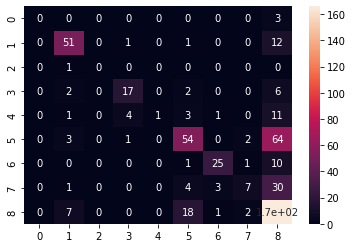

In [95]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [99]:
recall = np.diag(cf_matrix) / np.sum(cf_matrix, axis = 1)
precision = np.diag(cf_matrix) / np.sum(cf_matrix, axis = 0)
precision = precision[np.logical_not(np.isnan(precision))]
print(f'Precision and Recall is {np.mean(precision)}, {np.mean(recall)} respectively')

Precision and Recall is 0.732685093998184, 0.39824991857286873 respectively


C:\Users\vskar\AppData\Local\Temp/ipykernel_17036/1645992119.py:2: RuntimeWarning: invalid value encountered in true_divide
  precision = np.diag(cf_matrix) / np.sum(cf_matrix, axis = 0)


In [84]:
import joblib
joblib.dump(clf, 'model.pkl')

['model.pkl']